----------
Polynomial Regression
-----------

Non-linearning regressiya, ma'lumotlar o'xshash o'zgaruvchanlarning (masalan, narxlarning, haroratning yoki ta'sirlarning) o'zaro bog'liqlikini aniqlashda ishlatiladi, lekin odatiy regressiya modellari (masalan, **linearning regressiya**) mos kelmaydi. Bu regressiya turi, o'xshash o'zgaruvchanlarning o'zaro bog'liqlikini ifodalash uchun non-linearning funktsiyalarni (masalan, murtad funksiya, eksponentsiyal funksiya, polinom funksiya, logarifmik funksiya) foydalanadi.


Polinomial regressiya, o'zgaruvchanlarning o'zaro bog'liqlikini aniqlashda ishlatiladigan bir regressiya turi. Bu regressiya turi, ma'lumotlar o'xshash o'zgaruvchanlarning o'zaro bog'liqlikini ifodalashda mos keladigan polinomial funksiyaning (darajali funksiyaning) to'plamini ishlatadi. Bunday regressiya modeli, odatiy ***linearning regressiya*** modelining (y=mx+b) bilan farq qiladi.

Polinomial regressiya quyidagi vazifalarni bajaradi:
    1. Non-linearning bog'liqliklarni aniqlash
    2. Overfittingni kamaytirish

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Endi mavzuyimizga mos datasetni yuklab olamiz, tepada kerakli kutubxonalar o'rnatilgan

In [106]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
   
df = pd.read_csv(url)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Manashu datasetni bir - biri bilan qanday bog'langanini ko'ramiz:

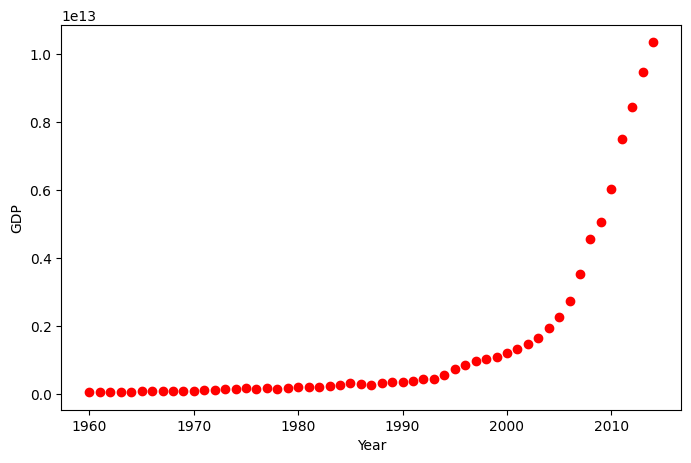

In [107]:
plt.figure(figsize=(8,5)) # Rasm o'lchamlari
x_data, y_data = (df["Year"].values, df["Value"].values) # qiymatlari
plt.plot(x_data, y_data, 'ro') # Tasvirni yasash
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Ma'lumotlarni ajratib olamiz va Normalizasiya qilamiz
--------------

Ya'ni jadvalda qiymatlarimiz juda katta bo'kganligi uchun biz ularni [0,1] qiymatlar orasiga tushurib olayapmiz.
Bu hisoblashimizga ham ko'rinishiga ham osonroq bo'ladi.

In [108]:
X = np.asanyarray(df[['Year']]/df.Year.max())
Y = np.asanyarray(df[['Value']]/df.Value.max())

Linear Regression
----------

Boshlanishiga ushbu modelni yuklab olamiz va o'rgatishni boshlaymiz

In [109]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

LinearRegression()

yhat - Y dan bashorat qilingan qiymat

In [110]:
yhat = model.predict(X)

grafikdagi to'g'ri chiziq yhat ni qiymatlari, keyinroq uni qizil rangdagiga o'xshatib olamiz

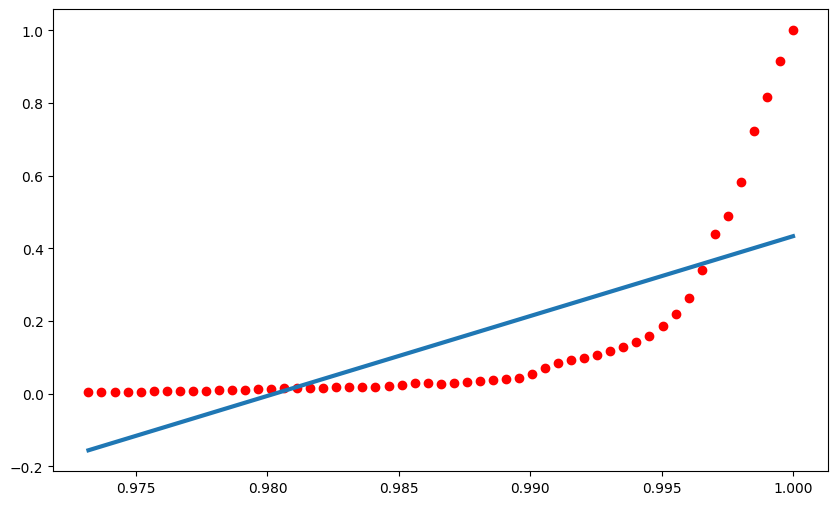

In [111]:
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'ro', label='data')
plt.plot(X,yhat, linewidth=3.0, label='fit')
plt.show()

Boshidagi Y va biz bashorat qilgan yhat qiymatlarni absolyut qiymatini hisoblab ko'ramiz

In [112]:
from sklearn.metrics import mean_absolute_error

print("MAE:", mean_absolute_error(yhat,Y))

MAE: 0.12657979406214762


------------------
Polynomial regression
-----------------

Endi bu model yordagi qiymatlarimizni aniqligini oshiramiz

In [116]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

Tepadagi modelga qaytadan qiymatlarni beraib o'qitamiz

In [117]:
model.fit(X_poly, Y)

LinearRegression()

Yangi hosil bo'lgan yhat qiymatlari

In [118]:
yhat = model.predict(X_poly)

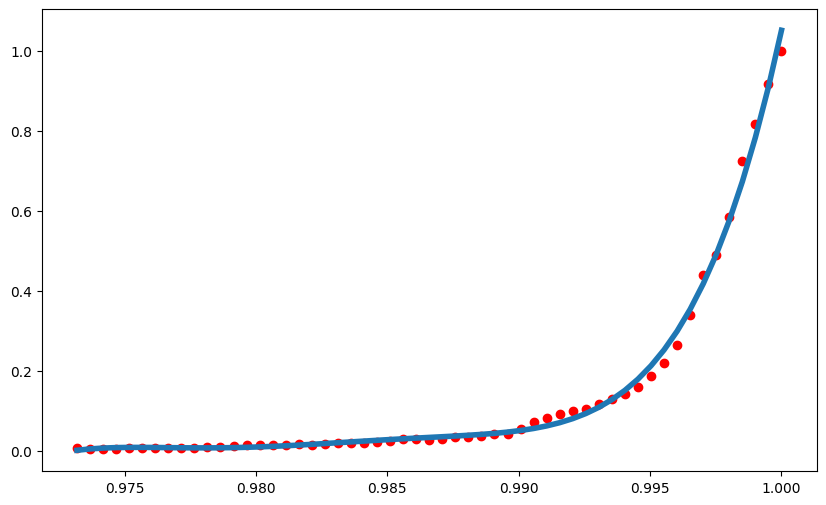

In [120]:
plt.figure(figsize=(10,6))
plt.plot(X, Y, 'ro', label='data')
plt.plot(X,yhat, linewidth=4.0, label='fit')
plt.show()

Boshidagi Y qiymat bilan bizni yangi qiymatni absolyut xatoligini hisoblab ko'ramiz

In [121]:
print("MAE:", mean_absolute_error(yhat,Y))

MAE: 0.009253960919999624


-------------
curve_fit
------------

'curve_fit' yordamida o'zimiz yozgan funksiyalar asosida model qurishimiz mumkin.

Misol uchun, yuqoridagi ma'lumotlar Logistic regression funksiyasi yordamida aniqroq bashorat qilinishi mumkin.

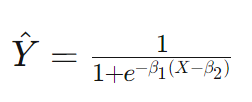

Keling, logisti regression funksiyasini yozib olamiz:

Bunda qiymatlarini olib, shularni Normalizatsiya qilayapmiz

In [122]:
x_data, y_data = (df["Year"].values, df["Value"].values)
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

Tepadagi formulani funksiya sifat qilib yozib olamiz

In [123]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Tepadagi rasmdagi formulani teta1 va teta2 qiymatlarini topib olamiz

In [125]:
from scipy.optimize import curve_fit

beta, pcov = curve_fit(sigmoid, xdata, ydata)
print(f"beta1={beta[0]}\nbeta2={beta[1]}")

beta1=690.4517118227653
beta2=0.9972071272524615


Bu usul yordamida Biz bashorat qilgan qiymatlarimizni grafini oldingisini nisbatan aniqligi kamroq chiqdi

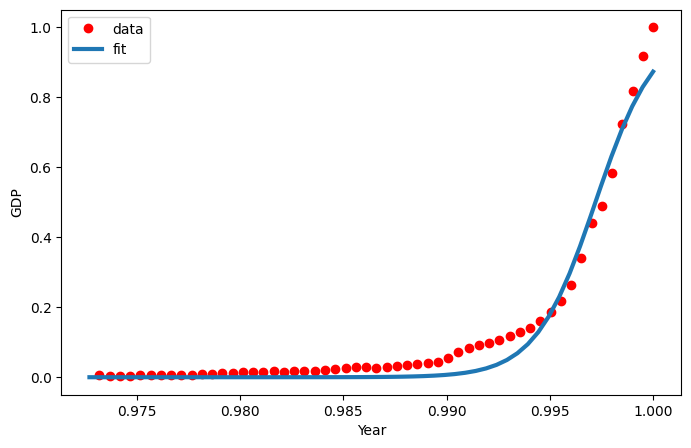

In [126]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
yhat = sigmoid(x, *beta)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,yhat, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Absolyut xatoligi ham oldingisidan boshqacha qiymat chiqdi

In [127]:
print("MAE:", mean_absolute_error(yhat,ydata))

MAE: 0.03049841883900717
